# Welcome to the ProgPy ProgModels example notebook for Sim!

One of the most basic of functions using a model is simulation. Simulation is the process of predicting the evolution of system state with time, given a specific future load profile. Unlike full prognostics, simulation does not include uncertainty in the state and other product (e.g., output) representation. For a prognostics model, simulation is done using the prog_models.PrognosticsModel.simulate_to() and prog_models.PrognosticsModel.simulate_to_threshold() methods.

‎ 

In this Notebook, we will explore the process of creating a model, simulating it, and analyzing the results. We will use an example of a battery being simulated for a set period of time and then till threshold is met.

But first, let us define the two main functions that will be used for simulating results!

#### [__simulate_to__](https://nasa.github.io/progpy/api_ref/prog_models/PrognosticModel.html#prog_models.PrognosticsModel.simulate_to) : Simulate prognostics model for a given number of seconds



#### [__simulate_to_threshold__](https://nasa.github.io/progpy/api_ref/prog_models/PrognosticModel.html#prog_models.PrognosticsModel.simulate_to_threshold) : Simulate prognostics model until any or specified threshold(s) have been met

With these two functions defined, let's get started with the example!

### Step 1. Importing the necessary libraries and creating model object!

In [ ]:
import matplotlib.pyplot as plt
from prog_models.models import BatteryElectroChem
from prog_models.models import BatteryCircuit as Battery
from prog_models.loading import Piecewise

In [ ]:
batt = Battery()

### Step 2: Define future loading function - here we're using a piecewise scheme

In [ ]:
future_loading = Piecewise(
    batt.InputContainer,
    [600, 900, 1800, 3600, float('inf')],
    {'i': [2, 1, 4, 2, 3]})

#### Method 1: Simulating to a specific time

In [ ]:
print('\n\n------------------------------------------------')
print('Simulating for 200 seconds\n\n')
simulated_results = batt.simulate_to(200, future_loading, print = True, progress = True)

The result of the simulation is now stored in simulated_results. You can access the results by accessing the individual variables: times, inputs, states, outputs, event_states. E.g., states = simulated_results.states.

You can also plot the results, for example

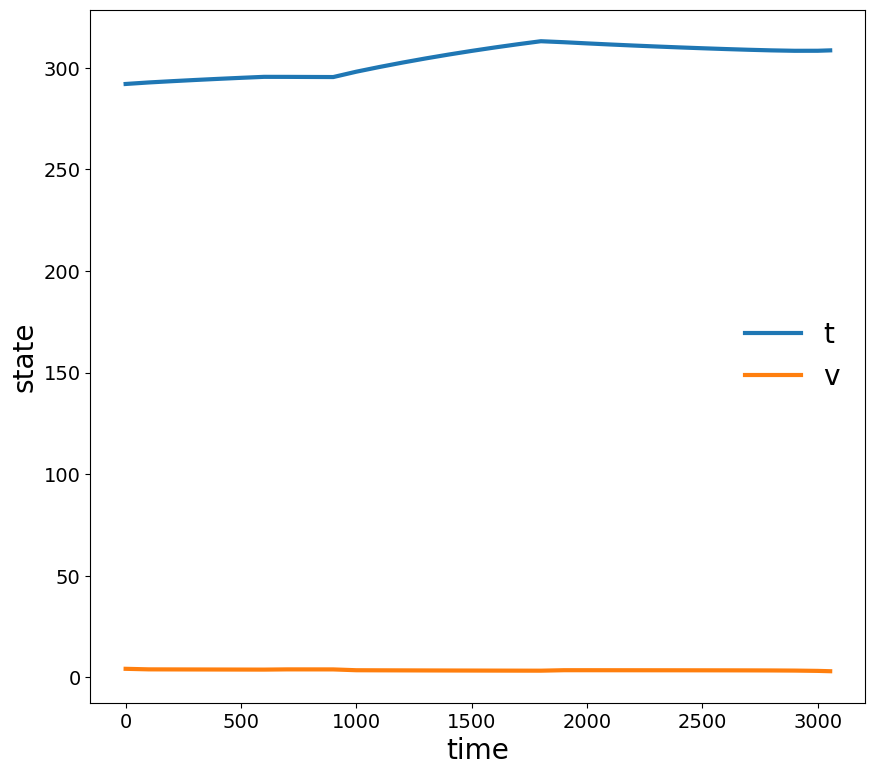

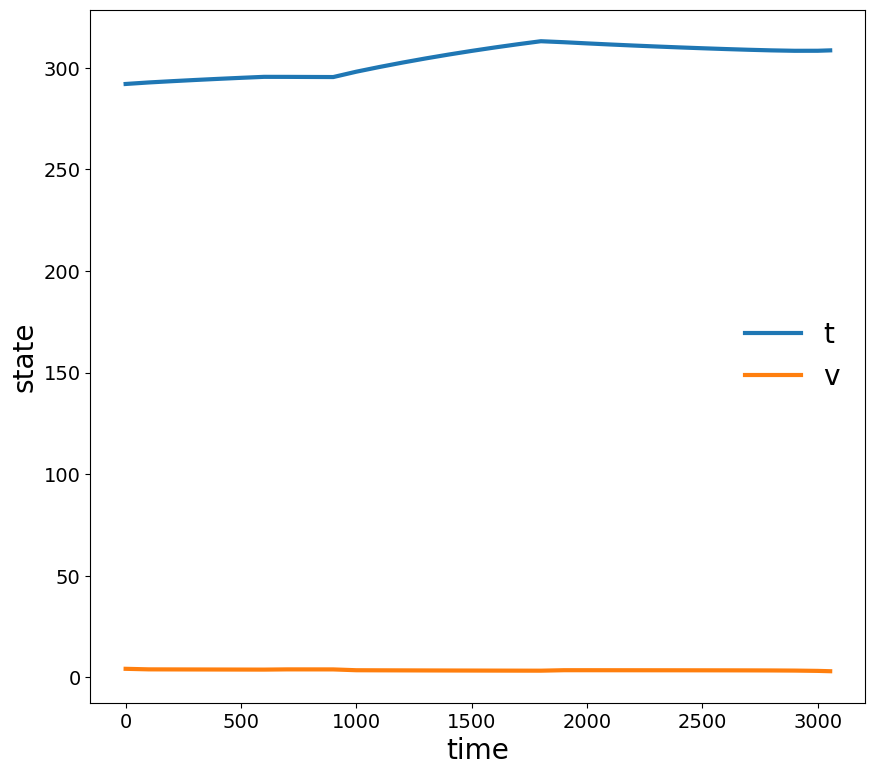

In [9]:
simulated_results.outputs.plot()

or, with configuration...

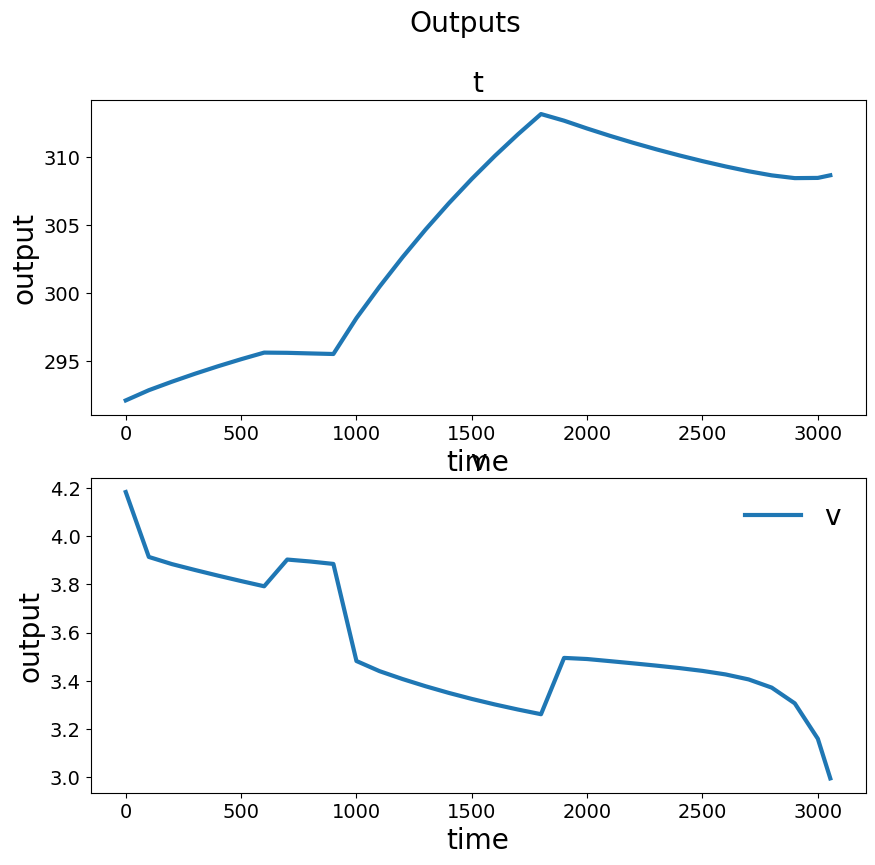

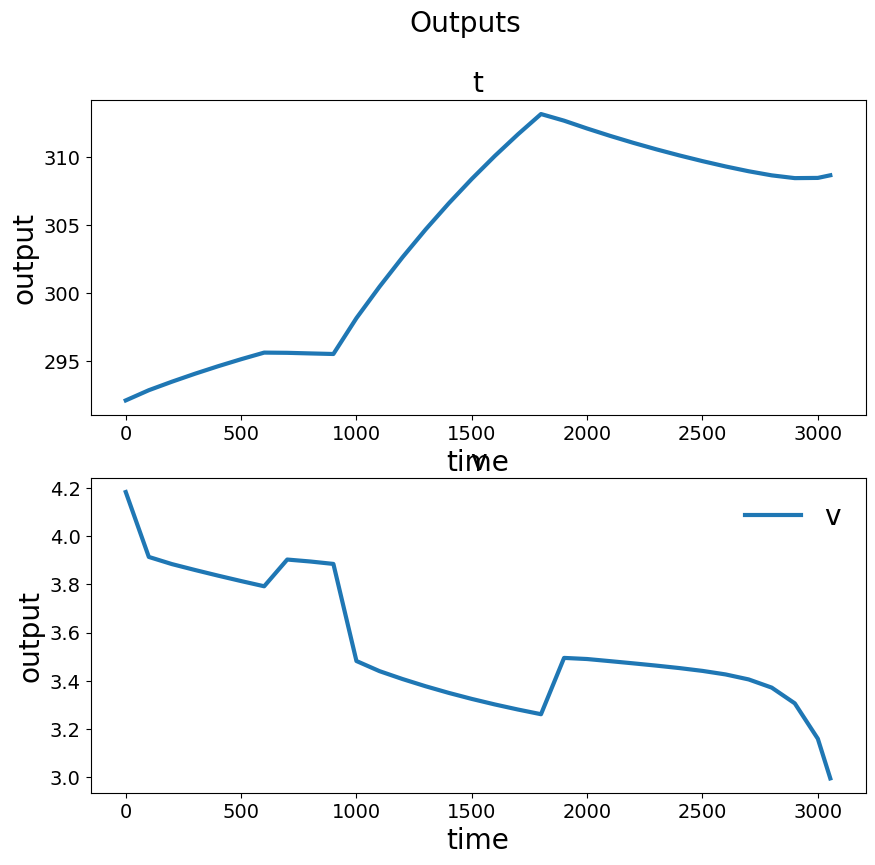

In [10]:
simulated_results.outputs.plot(compact = False, suptitle = 'Outputs', title = 'example title', xlabel = 'time', ylabel = 'output')

#### Method 2) Using `simulate_to_threshold()`

By using simulate_to_threshold() instead of simulate_to(), you can simulate the model until a threshold is met. The threshold can be specified in terms of any of the states, inputs, or outputs. 

For the battery model, the default threshold_met() function returns True when the voltage is less than the End of Discharge Voltage Threshold (EODV), which by default is 3V.



------------------------------------------------
Simulating to threshold


Time: 0.0
	Input: {'i': 2.0}
	State: {'tb': 292.1, 'qb': 7856.3254, 'qcp': 0.0, 'qcs': 0.0}
	Output: {'t': 292.1, 'v': 4.182999999010731}
	Event State: {'EOD': 1.0}

Progress |----------------------------------------------------------------------------------------------------| 0.0% 
Progress |██--------------------------------------------------------------------------------------------------| 2.0% 
 Time: 100.0
	Input: {'i': 2.0}
	State: {'tb': 292.85034308470006, 'qb': 7656.2860232109815, 'qcp': 2.0017299745357557, 'qcs': 25.26382471626325}
	Output: {'t': 292.85034308470006, 'v': 3.913917054871467}
	Event State: {'EOD': 0.974278079363634}

Progress |████------------------------------------------------------------------------------------------------| 4.0% 
 Time: 200.0
	Input: {'i': 2.0}
	State: {'tb': 293.47393706993756, 'qb': 7456.247053719513, 'qcp': 2.0667478886420736, 'qcs': 25.268359084272696}
	Output: {

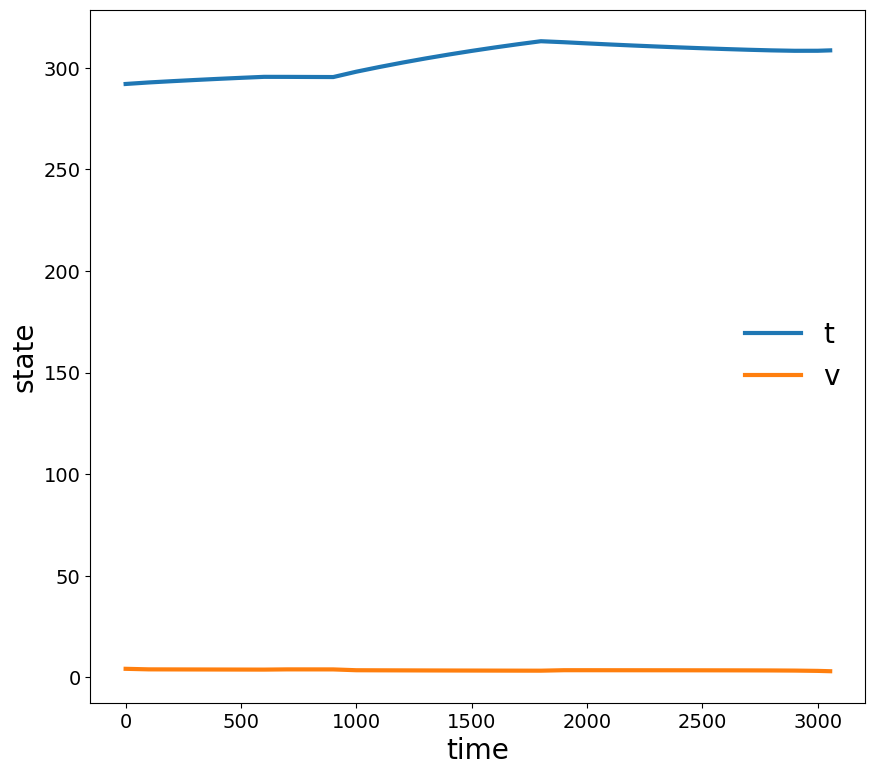

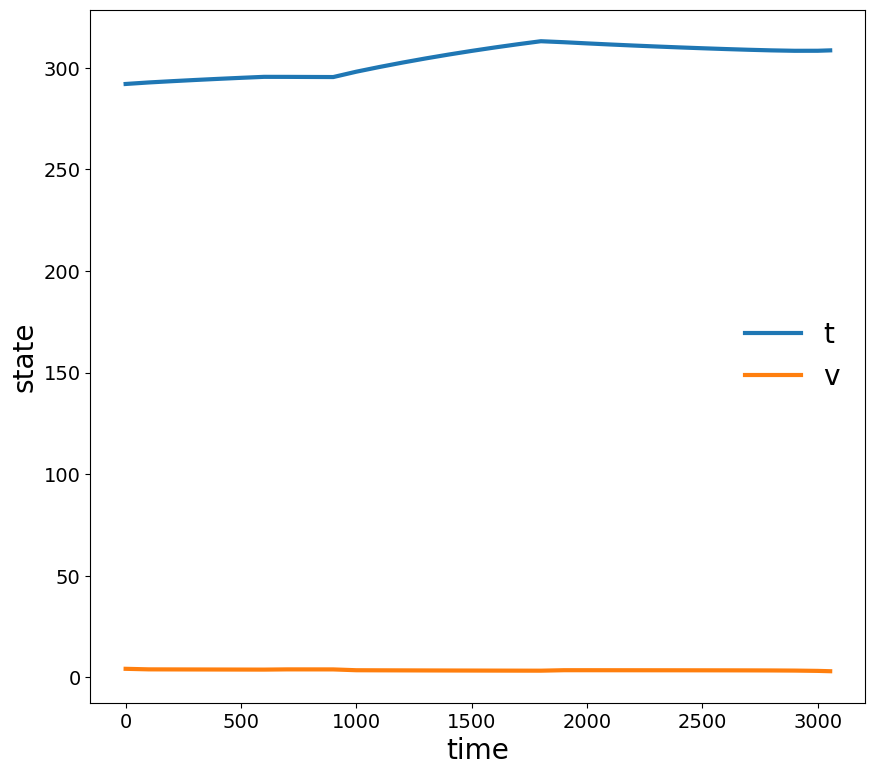

In [11]:
print('\n\n------------------------------------------------')
print('Simulating to threshold\n\n')
options = {
    'save_freq': 100,  # Frequency at which results are saved
    'dt': 2,  # Timestep
    'print': True,
    'progress': True
}
simulated_results = batt.simulate_to_threshold(future_loading, **options)
simulated_results.outputs.plot()

Alternately, you can set a max step size and allow step size to be adjusted automatically! Setting max step size automatically will allow the save points, stop points, and future loading change points to be met exactly.

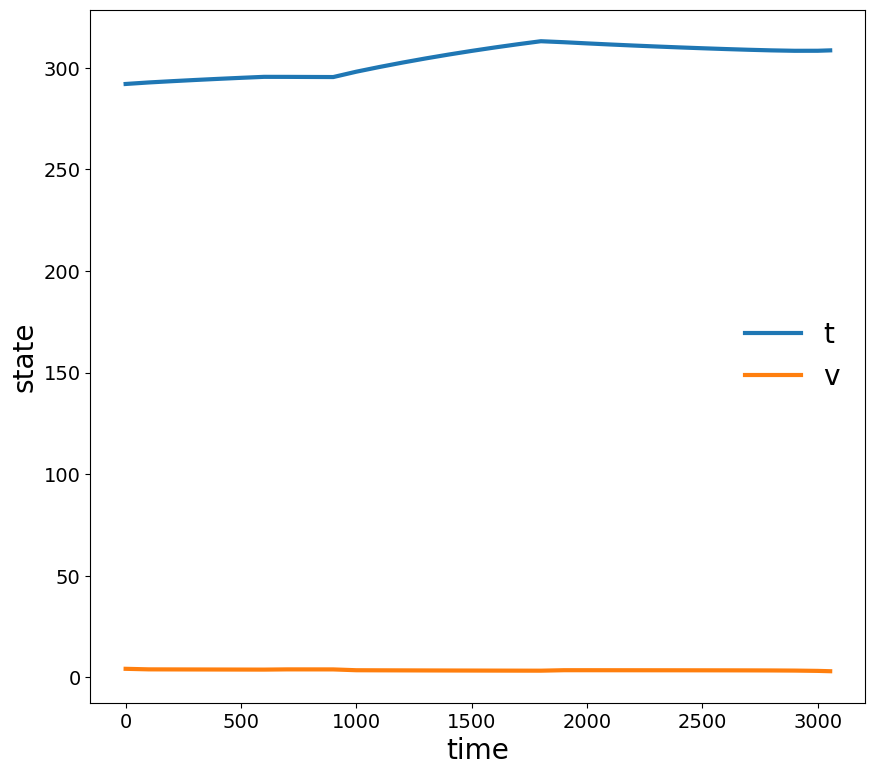

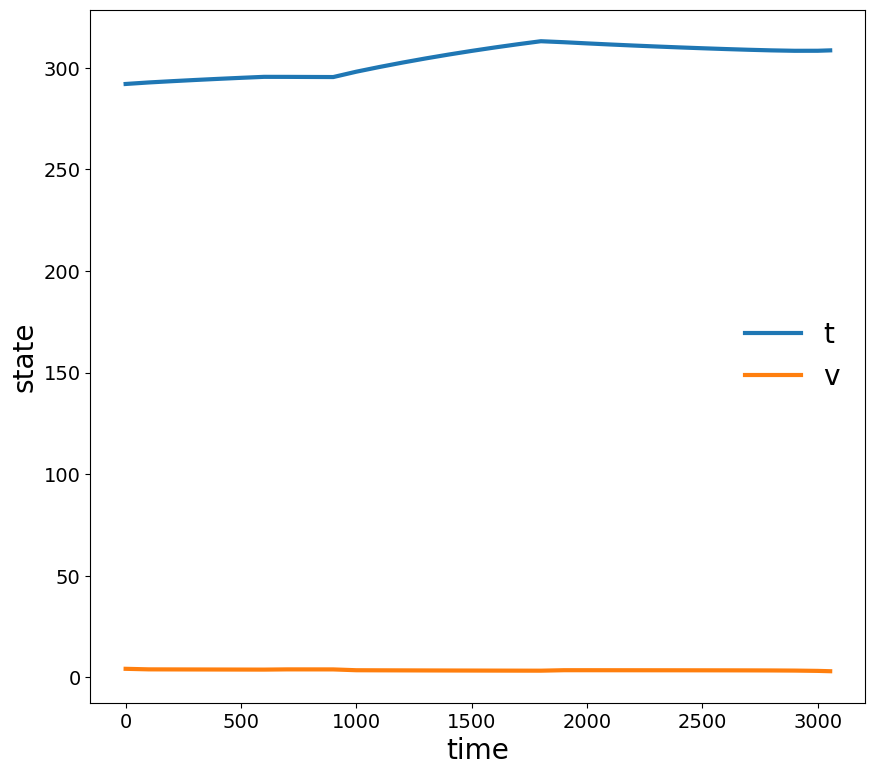

In [14]:
options['dt'] = ('auto', 2)
options['save_freq'] = 201  # Save every 201 seconds
options['save_pts'] = [250, 772, 1023]  # Special points we should like to see reported
simulated_results.outputs.plot()

### Optional Step) Changing Integration Method

You can also change the integration method. For example:

In [ ]:
options['integration_method'] = 'rk4'  # Using Runge-Kutta 4th order
simulated_results_rk4 = batt.simulate_to_threshold(future_loading, **options)

simulated_results_rk4.outputs.plot(compact=False)

plt.show()